The company wants to develop a model through which they can do churn 
prediction of the accounts and provide segmented offers to potential churners. 

The current project is aimed at developing a churn prediction model for this company and to provide business 
recommendations on a campaign focused on retaining customers.

## Importing libraries and reading the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [4]:
df = pd.read_csv("CC_without_outlier.csv")

In [5]:
df.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,Churn,Clusters
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,160.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,121.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,130.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0


In [6]:
df_outlier = pd.read_csv("CC_with_outlier.csv")

In [7]:
df_outlier.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,Churn,Clusters
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,160.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,121.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,130.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0


## VIF test

### Iteration 1

In [8]:
X = df.drop(['Churn'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.1300711964122163
City_Tier ---> 5.960804243376683
CC_Contacted_LY ---> 12.638335600481307
Service_Score ---> 21.554365033780417
User_Count ---> 16.188943500384017
CC_Score ---> 5.759190822218439
Rev_Permonth ---> 4.658711011617393
Complain_LY ---> 1.4064640833237552
Days_Since_CC ---> 3.73488558455087
Cashback ---> 43.063895507529
Payment_Creditcard ---> 3.958755264640681
Payment_Debitcard ---> 4.839854654071405
Payment_Ewallet ---> 2.459348679192367
Payment_UPI ---> 1.7022162343669194
Gender_Male ---> 2.4471408893137725
ACSegment_Regular ---> 1.7237474280593426
ACSegment_Regularplus ---> 4.267985557828862
ACSegment_Super ---> 3.353104875306688
ACSegment_Superplus ---> 1.9348363511477724
Maritalstatus_Married ---> 3.979705346419921
Maritalstatus_Single ---> 2.807619334363205
Logindevice_Mobile ---> 2.984537322190104
Clusters ---> 5.270327186789066


**Observations:** Cashback has the highest VIF. Hence that would be dropped and VIF checked again in Iteration 2

### Iteration 2

In [9]:
X = df.drop(['Churn','Cashback'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 22:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.0404824016253476
City_Tier ---> 5.665049421220818
CC_Contacted_LY ---> 12.180846777833473
Service_Score ---> 18.32465043343887
User_Count ---> 14.365089344972999
CC_Score ---> 5.551343845602458
Rev_Permonth ---> 4.540094058388847
Complain_LY ---> 1.3987269457026632
Days_Since_CC ---> 3.5573541289536936
Payment_Creditcard ---> 3.708549752620477
Payment_Debitcard ---> 4.5383228846196015
Payment_Ewallet ---> 2.4363409233209916
Payment_UPI ---> 1.6521749753422452
Gender_Male ---> 2.4261269087591733
ACSegment_Regular ---> 1.3600660770641124
ACSegment_Regularplus ---> 3.5443578883401266
ACSegment_Super ---> 3.143392451069439
ACSegment_Superplus ---> 1.5407949878041396
Maritalstatus_Married ---> 3.835413323877172
Maritalstatus_Single ---> 2.7223357779779316
Logindevice_Mobile ---> 2.9211719722874503
Clusters ---> 5.199778892670339


**Observations**: Service_Score has the next highest VIF. Hence that would be dropped and VIF calculated in iteration 3

### Iteration 3

In [10]:
X = df.drop(['Churn','Cashback', 'Service_Score'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 21:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.019119257535866
City_Tier ---> 5.602381557274718
CC_Contacted_LY ---> 12.002436580961007
User_Count ---> 11.537806714817242
CC_Score ---> 5.471426607332339
Rev_Permonth ---> 4.42313286934747
Complain_LY ---> 1.396281662214466
Days_Since_CC ---> 3.4071754548032236
Payment_Creditcard ---> 3.6578069283998835
Payment_Debitcard ---> 4.460918823390358
Payment_Ewallet ---> 2.430000370601703
Payment_UPI ---> 1.6473495024186757
Gender_Male ---> 2.421103745272801
ACSegment_Regular ---> 1.3600624558682664
ACSegment_Regularplus ---> 3.404809615496785
ACSegment_Super ---> 3.108524183020453
ACSegment_Superplus ---> 1.5407671529920397
Maritalstatus_Married ---> 3.8076659312766243
Maritalstatus_Single ---> 2.720416777416597
Logindevice_Mobile ---> 2.9071231628378005
Clusters ---> 5.185097155779111


**Observations :** CC_Contacted_LY shows the highest VIF. However, in Anova test, the F-stat was significant. Hence, instead of dropping this, Clusters can be dropped and see if CC_contacted_LY's VIF reduces. 

### Iteration 4

In [11]:
X = df.drop(['Churn','Cashback', 'Service_Score', 'Clusters'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 20:
        print (column ,"--->",  vif[i])
        i = i+1


Tenure ---> 3.019070770133683
City_Tier ---> 5.6002407490812205
CC_Contacted_LY ---> 5.070569405647767
User_Count ---> 11.49203439593503
CC_Score ---> 5.450479915106577
Rev_Permonth ---> 4.389704361922852
Complain_LY ---> 1.39579730765108
Days_Since_CC ---> 2.9992021680509446
Payment_Creditcard ---> 3.6250341501297663
Payment_Debitcard ---> 4.421335225361741
Payment_Ewallet ---> 2.416058621356595
Payment_UPI ---> 1.641608290052027
Gender_Male ---> 2.41438455959847
ACSegment_Regular ---> 1.3590303040058587
ACSegment_Regularplus ---> 3.276993579706394
ACSegment_Super ---> 3.0940443676349125
ACSegment_Superplus ---> 1.534701838461402
Maritalstatus_Married ---> 3.8065406745448263
Maritalstatus_Single ---> 2.714595096933338
Logindevice_Mobile ---> 2.9051488971315838


**Observations :** As expected, after dropping Clusters, CC_Contacted_LY's VIF reduced to 5. The next highest VIF is for User_Count. This variable will be dropped in next iteration.

### Iteration 5

In [12]:
X = df.drop(['Churn','Cashback', 'Service_Score', 'Clusters', 'User_Count'], axis=1)

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0

for column in X.columns:
    if i < 19:
        print (column ,"--->",  round(vif[i],0))
        i = i+1


Tenure ---> 3.0
City_Tier ---> 5.0
CC_Contacted_LY ---> 5.0
CC_Score ---> 5.0
Rev_Permonth ---> 4.0
Complain_LY ---> 1.0
Days_Since_CC ---> 3.0
Payment_Creditcard ---> 4.0
Payment_Debitcard ---> 4.0
Payment_Ewallet ---> 2.0
Payment_UPI ---> 2.0
Gender_Male ---> 2.0
ACSegment_Regular ---> 1.0
ACSegment_Regularplus ---> 3.0
ACSegment_Super ---> 3.0
ACSegment_Superplus ---> 2.0
Maritalstatus_Married ---> 4.0
Maritalstatus_Single ---> 3.0
Logindevice_Mobile ---> 3.0


**Observations:** After removing 4 variables apart from target variable, the VIF for all the variables has come to <=5. These 4 variables will be dropped from predictor variable list before modelling. However, User_Count had a significant Chi square value, hence that variable is retained. Hence only 3 variables will be removed before modelling.

In [13]:
VIF_drop = ['Cashback', 'Service_Score', 'Clusters']

In [14]:
df.shape

(11260, 24)

In [15]:
df_bkup = df.copy()

In [16]:
df.drop(VIF_drop, axis=1, inplace=True)

In [17]:
df.shape

(11260, 21)

## Train-Test Split

In [18]:
# Copy all the predictor variables into X dataframe
X = df.drop(['Churn'], axis=1)

# Copy target into the y dataframe. 
y = df['Churn']

In [19]:
df.shape

(11260, 21)

In [20]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y) 

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7882, 20), (3378, 20), (7882,), (3378,))

In [22]:
y_train.value_counts(1), y_test.value_counts(1)

(0    0.831642
 1    0.168358
 Name: Churn, dtype: float64,
 0    0.831557
 1    0.168443
 Name: Churn, dtype: float64)

## Smote resampled dataset

In [23]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape


(13110, 20)

In [24]:
y_res.shape

(13110,)

## Model evaluation function

In [25]:
def model_eval(model,xtrue,ytrue,ypred,probs):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

    # # calculate AUC
    auc = roc_auc_score(ytrue, probs)
    print('AUC: %.3f' % auc);


## Logistic Regression Model - SKLearn

### LR_model1 : Base model with outlier treated unscaled data

In [26]:
# Fit the Logistic Regression model
LR_model1 = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)

LR_model1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46339D+03    |proj g|=  4.46010D+04

At iterate   50    f=  2.32582D+03    |proj g|=  2.05006D+02

At iterate  100    f=  2.28945D+03    |proj g|=  1.12556D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21    100    119      1     0     0   1.126D+02   2.289D+03
  F =   2289.4521312930624     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(n_jobs=-1, random_state=123, verbose=True)

In [27]:
### Predicting on train and test dataset

LR_model1_ytrain_pred = LR_model1.predict(X_train)
LR_model1_ytest_pred = LR_model1.predict(X_test)

## Predicting probabilities on train dataset
LR_model1_trainprobs = LR_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model1_trainprobs = LR_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model1_testprobs = LR_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model1_testprobs = LR_model1_testprobs[:, 1]

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.8920324790662268
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.51      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.884


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


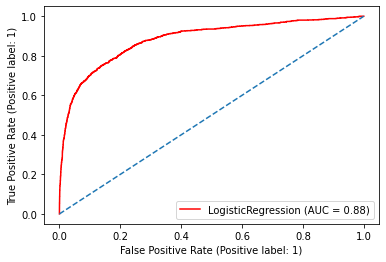

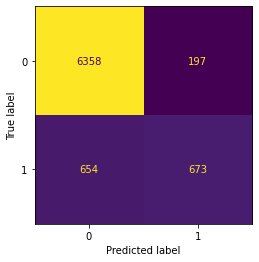

In [28]:
### Evaluation of training dataset

model_eval(LR_model1, X_train, y_train, LR_model1_ytrain_pred, LR_model1_trainprobs)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.8913558318531676
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.50      0.61       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.866


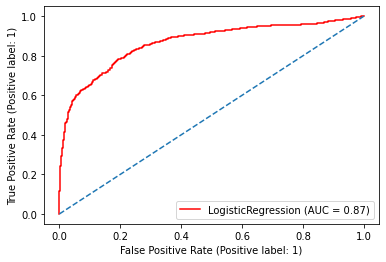

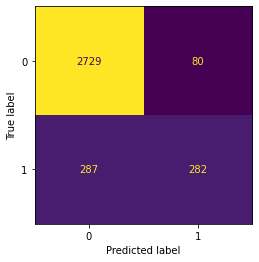

In [29]:
### Evaluation of test dataset

model_eval(LR_model1, X_test, y_test, LR_model1_ytest_pred, LR_model1_testprobs)

### LR_model: Hyperparameter tuning using GridSearchCV

In [30]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.0001,0.00001], # 0.1, 0.01,0.001,
     'l1_ratio':[0.25,0.5,0.75]}

In [31]:
model = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1)

In [32]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [33]:
grid_search.fit(X_train, y_train)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_lo

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_m

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packa

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarnin

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached w

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packa

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_lo

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'l1_ratio': [0.25, 0.5, 0.75],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [34]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.25, 'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(l1_ratio=0.25, max_iter=1000, n_jobs=-1, penalty='none',
                   random_state=1, solver='sag', tol=1e-05)


Best hyper parameters based on Grid search: 
    {'l1_ratio': 0.25, 'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

In [35]:
LR_model7 = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1,
                               l1_ratio=0.25,penalty='none',
                               solver='sag', tol=0.00001)

In [36]:
LR_model7 = LR_model7.fit(X_train, y_train)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


In [37]:
### Predicting on train and test dataset

LR_model7_ytrain_pred = LR_model7.predict(X_train)
LR_model7_ytest_pred = LR_model7.predict(X_test)

## Predicting probabilities on train dataset
LR_model7_trainprobs = LR_model7.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_model7_trainprobs = LR_model7_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model7_testprobs = LR_model7.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model7_testprobs = LR_model7_testprobs[:, 1]


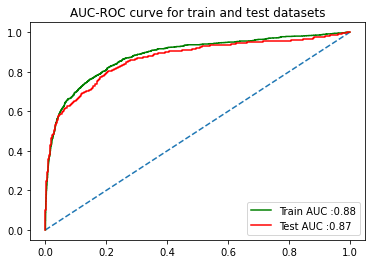

In [38]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_model7_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model7_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model7_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model7_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();



Accuracy :  0.890636894189292
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.50      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.884


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


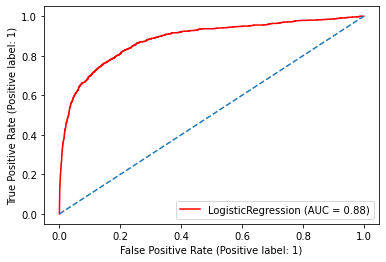

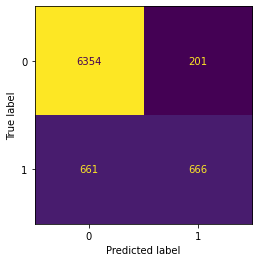

In [39]:
### model evaluation on train dataset
model_eval(LR_model7, X_train, y_train, LR_model7_ytrain_pred, LR_model7_trainprobs)

Accuracy :  0.8907637655417406
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.867


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


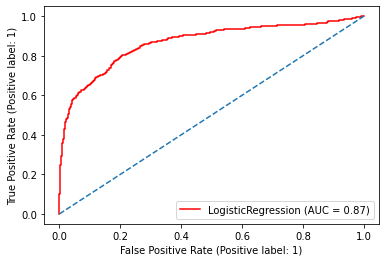

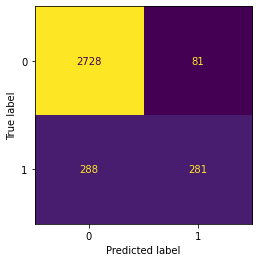

In [40]:
### model evaluation on test dataset
model_eval(LR_model7, X_test, y_test, LR_model7_ytest_pred, LR_model7_testprobs)

### LR_model3:LR_model1 fit on Smote resampled dataset

In [41]:
LR_model8 = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)
LR_model8 = LR_model8.fit(X_res, y_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.08716D+03    |proj g|=  2.68879D+04

At iterate   50    f=  5.63877D+03    |proj g|=  1.12560D+03


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished



At iterate  100    f=  5.61486D+03    |proj g|=  3.42798D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21    100    114      1     0     0   3.428D+01   5.615D+03
  F =   5614.8615817314376     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [42]:
### Predicting on train and test dataset

LR_model8_ytrain_pred = LR_model8.predict(X_res)
LR_model8_ytest_pred = LR_model8.predict(X_test)

## Predicting probabilities on train dataset
LR_model8_trainprobs = LR_model8.predict_proba(X_res)
# # keep probabilities for the positive outcome only
LR_model8_trainprobs = LR_model8_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model8_testprobs = LR_model8.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_model8_testprobs = LR_model8_testprobs[:, 1]


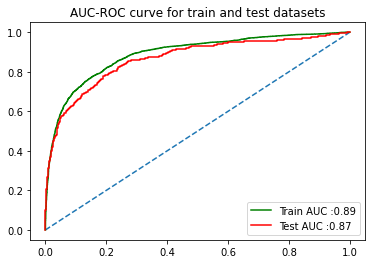

In [43]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_res, LR_model8_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model8_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_res, LR_model8_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model8_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.8092295957284515
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6555
           1       0.80      0.82      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110

AUC: 0.889


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


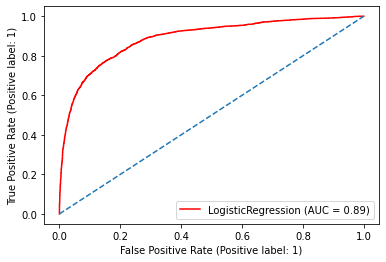

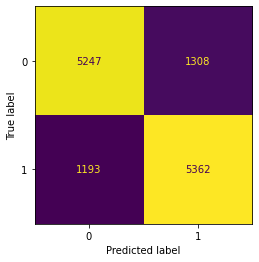

In [44]:
model_eval(LR_model8, X_res, y_res, LR_model8_ytrain_pred, LR_model8_trainprobs)


Accuracy :  0.7933688573120189
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2809
           1       0.44      0.79      0.56       569

    accuracy                           0.79      3378
   macro avg       0.69      0.79      0.71      3378
weighted avg       0.86      0.79      0.81      3378

AUC: 0.865


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


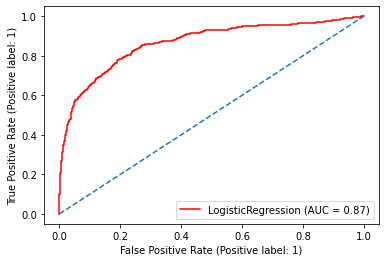

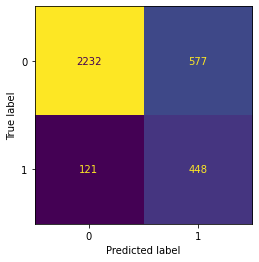

In [45]:
model_eval(LR_model8, X_test, y_test, LR_model8_ytest_pred, LR_model8_testprobs)

## LR_model: Logistic regression using default model, scaled data 

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
Xtrain_std = sc.fit_transform(X_train)
Xtest_std = sc.transform(X_test)

In [48]:
LR_model9 = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)
LR_model9 = LR_model9.fit(Xtrain_std, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46339D+03    |proj g|=  2.61400D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     19     21      1     0     0   2.625D-02   2.284D+03
  F =   2283.7271930553225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [49]:
### Predicting on train and test dataset
LR_model9_ytrain_pred = LR_model9.predict(Xtrain_std)
LR_model9_ytest_pred = LR_model9.predict(Xtest_std)

## Predicting probabilities on train dataset
LR_model9_trainprobs = LR_model9.predict_proba(Xtrain_std)
# # keep probabilities for the positive outcome only
LR_model9_trainprobs = LR_model9_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_model9_testprobs = LR_model9.predict_proba(Xtest_std)
# # keep probabilities for the positive outcome only
LR_model9_testprobs = LR_model9_testprobs[:, 1]


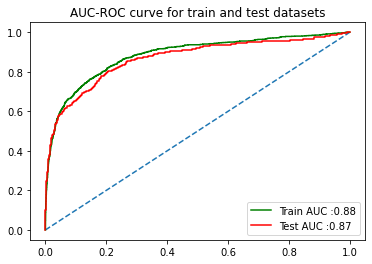

In [50]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, LR_model9_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_model9_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_model9_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_model9_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.8908906368941893
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.77      0.50      0.61      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.77      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.884


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


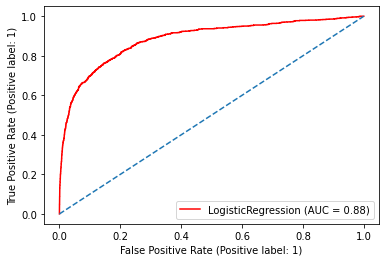

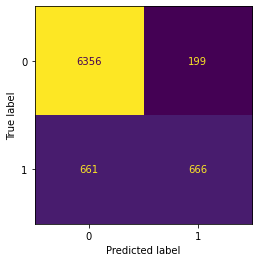

In [51]:
### Evaluation of training dataset
model_eval(LR_model9, Xtrain_std, y_train, LR_model9_ytrain_pred, LR_model9_trainprobs)

Accuracy :  0.8907637655417406
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378

AUC: 0.867


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


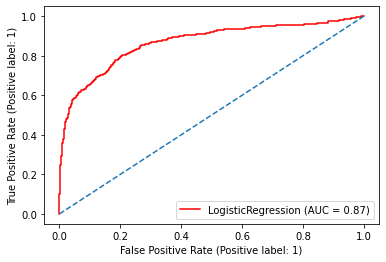

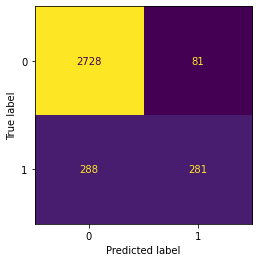

In [52]:
### Evaluation of test dataset
model_eval(LR_model9, Xtest_std, y_test, LR_model9_ytest_pred, LR_model9_testprobs)

**Observations:** The best model in LogisticRegression is the base model using Sklearn after dropping 3 variables that had high VIF. This would be compared against best models of other algorithms.

## Linear Discriminant Analysis

### LDA_model1: Base model with outlier treated unscaled data

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
#Build LDA Model & Train
LDA_model1 = LinearDiscriminantAnalysis()
LDA_model1 = LDA_model1.fit(X_train,y_train)

In [55]:
### Predicting on train and test dataset

LDA_model1_ytrain_pred = LDA_model1.predict(X_train)
LDA_model1_ytest_pred = LDA_model1.predict(X_test)

## Predicting probabilities on train dataset
LDA_model1_trainprobs = LDA_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA_model1_trainprobs = LDA_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA_model1_testprobs = LDA_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA_model1_testprobs = LDA_model1_testprobs[:, 1]


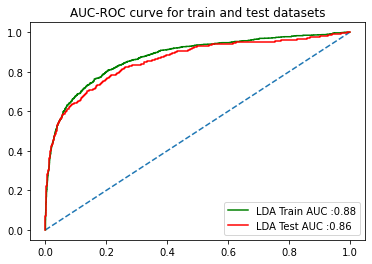

In [56]:
# # calculate roc AUC
train_auc = round(roc_auc_score(y_train, LDA_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA_model1_testprobs),2)
train_label_LDA = 'LDA Train AUC :' + str(train_auc)
test_label_LDA = 'LDA Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA_model1_trainprobs)
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test, LDA_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_LDA)
plt.plot(fpr_test_LDA, tpr_test_LDA, color='red', label=test_label_LDA)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.8869576249682821
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.876


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


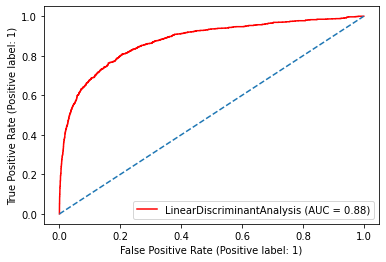

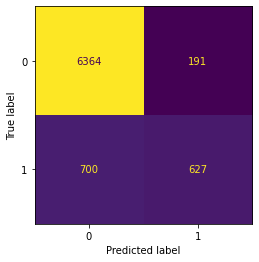

In [57]:
### Evaluation of training dataset

model_eval(LDA_model1, X_train, y_train, LDA_model1_ytrain_pred, LDA_model1_trainprobs)


Accuracy :  0.8848431024274719
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.45      0.57       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378

AUC: 0.858


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


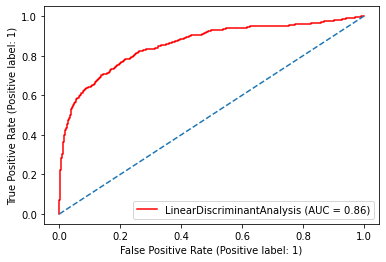

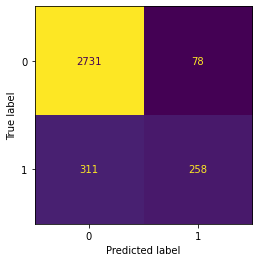

In [58]:
### Evaluation of test dataset

model_eval(LDA_model1, X_test, y_test, LDA_model1_ytest_pred, LDA_model1_testprobs)

### LDA_model2 : Hyperparameter tuning using Grid Search CV 

In [59]:
##Commenting GridSearch CV code after first run, as best parameters have been noted down and re-runs need not run this code again

grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.001, 0.0001,0.00001], 
     'shrinkage':['auto', float, 'None']}

In [60]:
model = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
63 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

-----

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', <class 'float'>, 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [61]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [62]:
LDA_model2 = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'lsqr', tol= 0.001)
LDA_model2 = LDA_model2.fit(X_train, y_train)

In [63]:
### Predicting on train and test dataset

LDA_model2_ytrain_pred = LDA_model2.predict(X_train)
LDA_model2_ytest_pred = LDA_model2.predict(X_test)

## Predicting probabilities on train dataset
LDA_model2_trainprobs = LDA_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA_model2_trainprobs = LDA_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA_model2_testprobs = LDA_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA_model2_testprobs = LDA_model2_testprobs[:, 1]

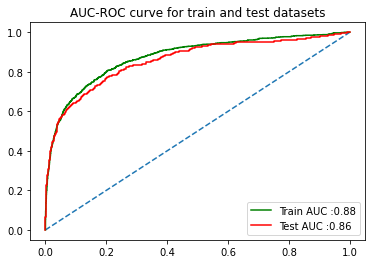

In [64]:
# # calculate auc and plot roc curve
train_auc = round(roc_auc_score(y_train, LDA_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA_model2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LDA_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  0.887338239025628
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.59      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882

AUC: 0.876


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


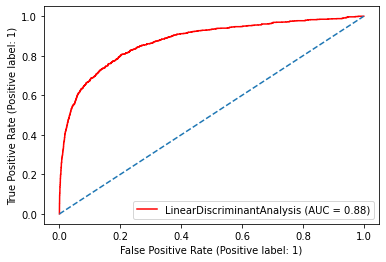

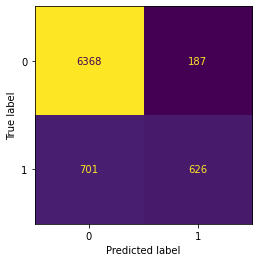

In [65]:
### Evaluation of training dataset
model_eval(LDA_model2, X_train, y_train, LDA_model2_ytrain_pred, LDA_model2_trainprobs)

Accuracy :  0.8848431024274719
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.45      0.57       569

    accuracy                           0.88      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.88      0.87      3378

AUC: 0.858


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


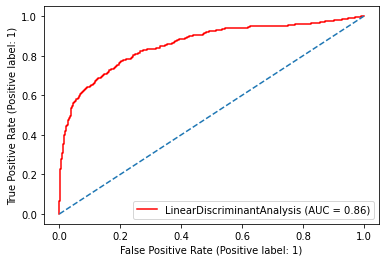

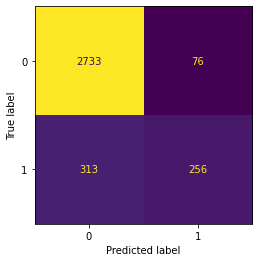

In [66]:
### Evaluation of test dataset
model_eval(LDA_model2, X_test, y_test, LDA_model2_ytest_pred, LDA_model2_testprobs)

In [67]:
pd.DataFrame(LDA_model2.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])

,Coefficient
Tenure,-0.127919
City_Tier,0.372012
CC_Contacted_LY,0.032366
User_Count,0.323650
CC_Score,0.280958
Rev_Permonth,0.127603
Complain_LY,1.916931
Days_Since_CC,-0.069039
Payment_Creditcard,-0.821820
Payment_Debitcard,-0.647071


## Support vector machine classifier

In [68]:
from sklearn import svm

In [69]:
def model_eval1(model,xtrue,ytrue,ypred):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

### Scaling data for SVM as it is distance based

In [70]:
from sklearn.preprocessing import StandardScaler    

In [71]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### SVM_model1 : Default base model

In [72]:
## Creating model and fitting train dataset

SVM_model1 = svm.SVC(random_state=1, probability=True)
SVM_model1.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [73]:
### Predicting on train and test dataset

SVM_model1_ytrain_pred = SVM_model1.predict(X_train)
SVM_model1_ytest_pred = SVM_model1.predict(X_test)

In [74]:
## Predicting probabilities on train dataset
SVM_model1_trainprobs = SVM_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
SVM_model1_trainprobs = SVM_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_model1_testprobs = SVM_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
SVM_model1_testprobs = SVM_model1_testprobs[:, 1]

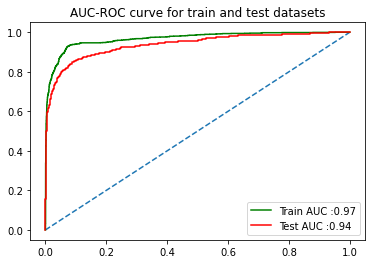

In [75]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, SVM_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, SVM_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, SVM_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, SVM_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.9412585638162903


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6555
           1       0.93      0.71      0.80      1327

    accuracy                           0.94      7882
   macro avg       0.93      0.85      0.88      7882
weighted avg       0.94      0.94      0.94      7882



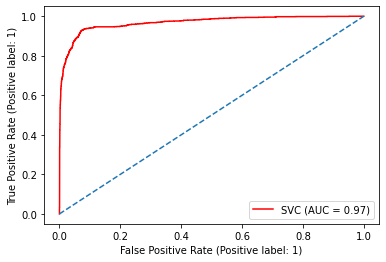

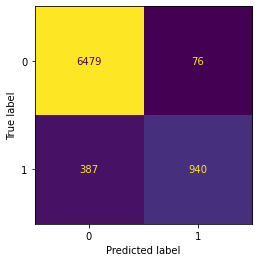

In [76]:
### Evaluation of training dataset
model_eval1(SVM_model1, X_train, y_train, SVM_model1_ytrain_pred)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.9274718768502073


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2809
           1       0.90      0.64      0.75       569

    accuracy                           0.93      3378
   macro avg       0.92      0.81      0.85      3378
weighted avg       0.93      0.93      0.92      3378



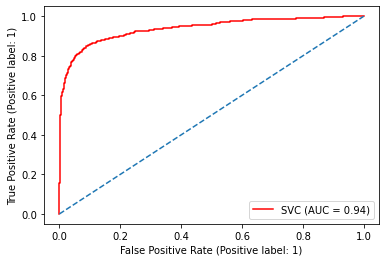

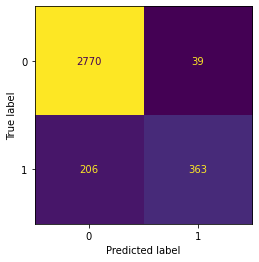

In [77]:
### Evaluation of test dataset
model_eval1(SVM_model1, X_test, y_test, SVM_model1_ytest_pred)

### SVM_model2: Hyperparameter tuned model

In [78]:
### Grid search 

grid={'C':[1,2,3,4,5,6,7,8,9],
      'kernel':['linear','poly','rbf','sigmoid'],
      'degree':[3,4,5],
      'gamma':['scale','auto'],
      'class_weight':['balanced','None'],
      'tol':[0.001,0.0001]
     }

In [79]:
model = svm.SVC(max_iter=2000,random_state=1)

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1296 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters wi

{'C': 9, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001} 

SVC(C=9, class_weight='balanced', degree=5, kernel='poly', max_iter=2000,
    random_state=1)


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [80]:
### Best parameters chosen has been recorded below
#{'C': 9, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001} 

In [81]:
SVM_model2 = svm.SVC(C=9, class_weight='balanced', degree=5, gamma='scale', kernel='poly', tol=0.001, random_state=1, probability=True)
SVM_model2 = SVM_model2.fit(X_train,y_train)

In [82]:
### Predicting on train and test dataset
SVM_model2_ytrain_pred = SVM_model2.predict(X_train)
SVM_model2_ytest_pred = SVM_model2.predict(X_test)

## Predicting probabilities on train dataset
SVM_model2_trainprobs = SVM_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
SVM_model2_trainprobs = SVM_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_model2_testprobs = SVM_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
SVM_model2_testprobs = SVM_model2_testprobs[:, 1]

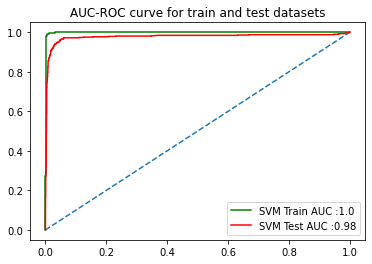

In [83]:
# # calculate roc AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, SVM_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, SVM_model2_testprobs),2)
train_label_SVM = 'SVM Train AUC :' + str(train_auc)
test_label_SVM = 'SVM Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, SVM_model2_trainprobs)
fpr_test_SVM, tpr_test_SVM, thresholds_test_SVM = roc_curve(y_test, SVM_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_SVM)
plt.plot(fpr_test_SVM, tpr_test_SVM, color='red', label=test_label_SVM)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.9873128647551382


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6555
           1       0.93      1.00      0.96      1327

    accuracy                           0.99      7882
   macro avg       0.97      0.99      0.98      7882
weighted avg       0.99      0.99      0.99      7882

AUC: 0.999


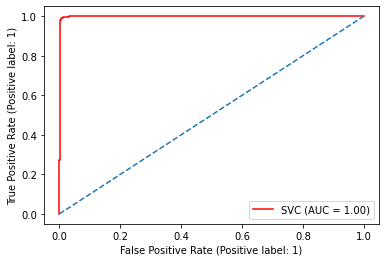

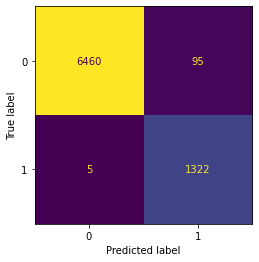

In [84]:
### Evaluation of training dataset
model_eval(SVM_model2, X_train, y_train, SVM_model2_ytrain_pred, SVM_model2_trainprobs)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.9653641207815276


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2809
           1       0.87      0.93      0.90       569

    accuracy                           0.97      3378
   macro avg       0.93      0.95      0.94      3378
weighted avg       0.97      0.97      0.97      3378

AUC: 0.977


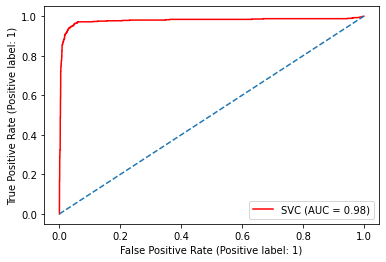

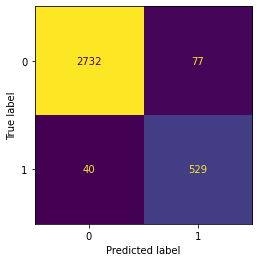

In [85]:
### Evaluation of test dataset
model_eval(SVM_model2, X_test, y_test, SVM_model2_ytest_pred, SVM_model2_testprobs)

### SVM_model3: SVM with outlier data & best GridSearchCV data

In [86]:
VIF_drop

['Cashback', 'Service_Score', 'Clusters']

In [87]:
X_outlier = df_outlier.drop(['Cashback', 'Service_Score', 'Clusters','Churn'],axis=1)
y_outlier = df_outlier['Churn']

In [88]:
# Split X and y into training and test set in 70:30 ratio
X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = train_test_split(X_outlier, y_outlier, test_size=0.30 , random_state=1, stratify=y) 

In [89]:
### Scaling
sc = StandardScaler()
X_train_outlier = sc.fit_transform(X_train_outlier)
X_test_outlier = sc.transform(X_test_outlier)

In [90]:
## Best grid data from SVM_model2: {'C': 9, 'class_weight': 'balanced', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.001} 
SVM_model3 = svm.SVC(C=9, class_weight='balanced', degree=5, gamma='scale', kernel='poly', tol=0.001, random_state=1, probability=True)

In [91]:
SVM_model3 = SVM_model3.fit(X_train_outlier,y_train_outlier)

In [92]:
### Predicting on train and test dataset

SVM_model3_ytrain_pred = SVM_model3.predict(X_train_outlier)
SVM_model3_ytest_pred = SVM_model3.predict(X_test_outlier)


In [93]:
## Predicting probabilities on train dataset
SVM_model3_trainprobs = SVM_model3.predict_proba(X_train_outlier)
# # keep probabilities for the positive outcome only
SVM_model3_trainprobs = SVM_model3_trainprobs[:, 1]

## Predicting probabilities on test dataset
SVM_model3_testprobs = SVM_model3.predict_proba(X_test_outlier)
# # keep probabilities for the positive outcome only
SVM_model3_testprobs = SVM_model3_testprobs[:, 1]

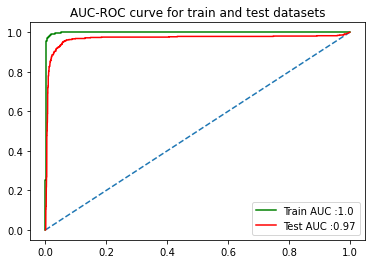

In [94]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train_outlier, SVM_model3_trainprobs),2)
test_auc = round(roc_auc_score(y_test_outlier, SVM_model3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_outlier, SVM_model3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_outlier, SVM_model3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();



/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.9786856127886323


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6555
           1       0.89      0.99      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.95      0.98      0.96      7882
weighted avg       0.98      0.98      0.98      7882

AUC: 0.998


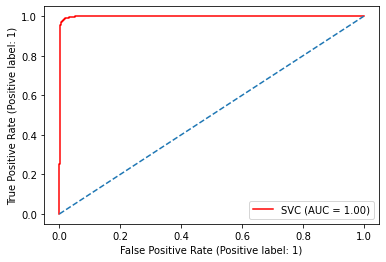

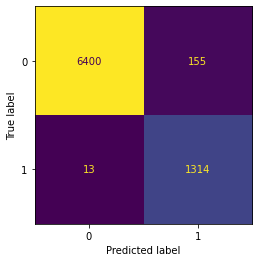

In [95]:
### Evaluation of training dataset
model_eval(SVM_model3, X_train_outlier, y_train_outlier, SVM_model3_ytrain_pred, SVM_model3_trainprobs)

/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy :  0.9544108940201302


/Users/abhisheksharma/opt/miniconda3/envs/hello/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2809
           1       0.83      0.92      0.87       569

    accuracy                           0.95      3378
   macro avg       0.91      0.94      0.92      3378
weighted avg       0.96      0.95      0.96      3378

AUC: 0.968


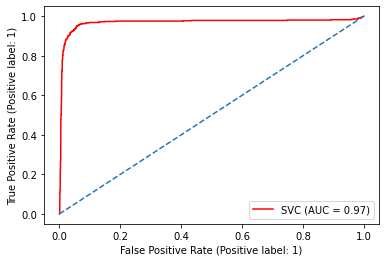

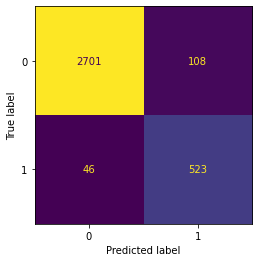

In [96]:
### Evaluation of test dataset
model_eval(SVM_model3, X_test_outlier, y_test_outlier, SVM_model3_ytest_pred, SVM_model3_testprobs)

**Observations**: Out of the 4 algorithms in this notebook, Logistic regression and LDA are linear models.SVM has both linear and non-linear implementations. The best model is SVM's non-linear poly kernel (SVM_model2) and has given a test precision and recall of 0.87 and 0.93 respectively.

### Feature importance for the best SVM model

In [97]:
from sklearn.inspection import permutation_importance

In [98]:
imps = permutation_importance(SVM_model2, X_test, y_test)

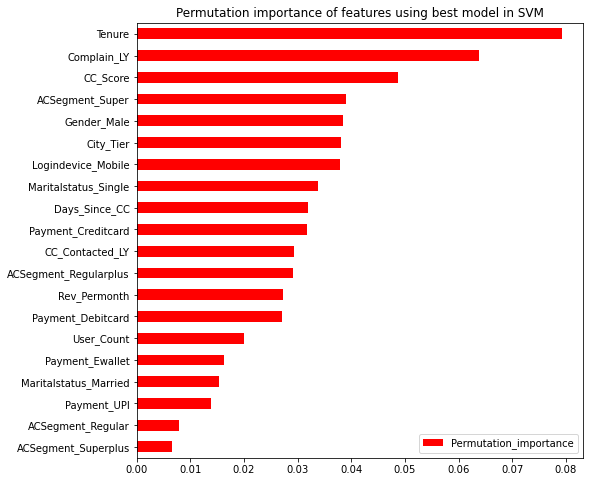

In [99]:
imp_df = pd.DataFrame(imps.importances_mean, columns=['Permutation_importance'], index = X.columns)
## plotting graph
imp_df = imp_df.sort_values(by='Permutation_importance')
#my_colors = 'rgbcmy'
my_colors = ['red','green','blue','black','orange','cyan','magenta','brown']
imp_df.plot(kind='barh', color = my_colors, figsize=(8,8))
plt.title("Permutation importance of features using best model in SVM")
plt.show();


### Comparison of ROC curve for best models of each algorithm

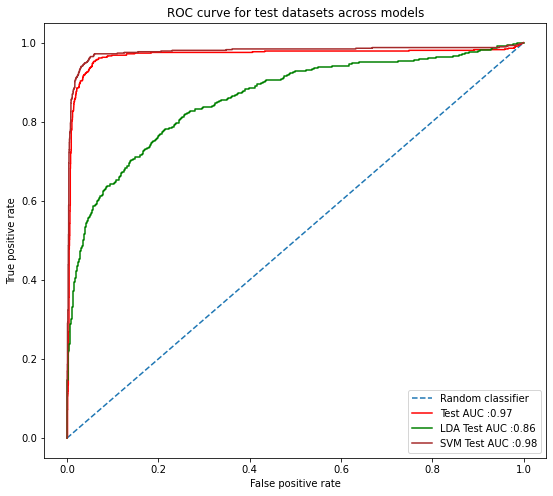

In [103]:
# # plot the roc curve for the model
plt.figure(figsize=(9,8))
plt.plot([0, 1], [0, 1], linestyle='--',label='Random classifier')
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.plot(fpr_test_LDA, tpr_test_LDA, color='green', label=test_label_LDA)
plt.plot(fpr_test_SVM, tpr_test_SVM, color='brown', label=test_label_SVM)
plt.legend(loc='best')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for test datasets across models")
plt.show();

In [105]:
fpr_test.shape, fpr_test_LDA.shape, fpr_test_SVM.shape 

((322,), (711,), (301,))

In [109]:
## Writing the ROC curve values to disk for comprehensive plotting in next part of python notebook
## Cannot write in one file as the arrays are of different lengths

df_LR = pd.DataFrame(pd.concat([pd.Series(fpr_test),pd.Series(tpr_test)],axis=1))
df_LR.columns = ['fpr_test','tpr_test']
df_LR.to_csv("ROC_LR.csv",index=False)

df_LDA = pd.DataFrame(pd.concat([pd.Series(fpr_test_LDA),pd.Series(tpr_test_LDA)],axis=1))
df_LDA.columns = ['fpr_test_LDA','tpr_test_LDA']
df_LDA.to_csv("ROC_LDA.csv",index=False)

df_SVM = pd.DataFrame(pd.concat([pd.Series(fpr_test_SVM),pd.Series(tpr_test_SVM)],axis=1))
df_SVM.columns = ['fpr_test_SVM','tpr_test_SVM']
df_SVM.to_csv("ROC_SVM.csv",index=False)

## To be continued

The next python notebook will contain remaining models such as ANN, KNN, Random forest, Adaboost and Gradient boost